<a href="https://colab.research.google.com/github/MDRobiulhassan/Machine-Learning-Predictions/blob/main/Earthquake_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
df = pd.read_csv('/content/drive/MyDrive/University/7th Semester/MLL/colab/Eartquakes-1990-2023.csv')

In [68]:
df.head()

,time,place,status,tsunami,significance,data_type,magnitudo,state,longitude,latitude,depth,date
0,631153353990,"12 km NNW of Meadow Lakes, Alaska",reviewed,0,96,earthquake,2.50,Alaska,-149.669200,61.730200,30.100,1990-01-01 00:22:33.990000+00:00
1,631153491210,"14 km S of Volcano, Hawaii",reviewed,0,31,earthquake,1.41,Hawaii,-155.212333,19.317667,6.585,1990-01-01 00:24:51.210000+00:00
2,631154083450,"7 km W of Cobb, California",reviewed,0,19,earthquake,1.11,California,-122.806167,38.821000,3.220,1990-01-01 00:34:43.450000+00:00
3,631155512130,"11 km E of Mammoth Lakes, California",reviewed,0,15,earthquake,0.98,California,-118.846333,37.664333,-0.584,1990-01-01 00:58:32.130000+00:00
4,631155824490,"16km N of Fillmore, CA",reviewed,0,134,earthquake,2.95,California,-118.934000,34.546000,16.122,1990-01-01 01:03:44.490000+00:00


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3445751 entries, 0 to 3445750
Data columns (total 12 columns):
 #   Column        Dtype  
---  ------        -----  
 0   time          int64  
 1   place         object 
 2   status        object 
 3   tsunami       int64  
 4   significance  int64  
 5   data_type     object 
 6   magnitudo     float64
 7   state         object 
 8   longitude     float64
 9   latitude      float64
 10  depth         float64
 11  date          object 
dtypes: float64(4), int64(3), object(5)
memory usage: 315.5+ MB


In [70]:
df.shape

(3445751, 12)

In [71]:
df.isna().sum() / len(df)

,0
time,0.0
place,0.0
status,0.0
tsunami,0.0
significance,0.0
data_type,0.0
magnitudo,0.0
state,0.0
longitude,0.0
latitude,0.0


In [72]:
df.duplicated().sum()

np.int64(16869)

In [73]:
df = df.drop_duplicates().reset_index(drop=True)

In [74]:
df.duplicated().sum()

np.int64(0)

In [75]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
time,3428882.0,1.247118e+12,2.975887e+11,6.311534e+11,1.024409e+12,1.282329e+12,1.508620e+12,1.690629e+12
tsunami,3428882.0,4.424183e-04,2.102909e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
significance,3428882.0,7.400236e+01,1.016332e+02,0.000000e+00,1.300000e+01,3.300000e+01,8.100000e+01,2.910000e+03
magnitudo,3428882.0,1.773933e+00,1.291012e+00,-9.990000e+00,9.100000e-01,1.460000e+00,2.300000e+00,9.100000e+00
longitude,3428882.0,-1.012787e+02,7.698497e+01,-1.799997e+02,-1.464195e+02,-1.189527e+02,-1.159280e+02,1.800000e+02
latitude,3428882.0,3.746733e+01,2.040831e+01,-8.442200e+01,3.406400e+01,3.793420e+01,4.784117e+01,8.738600e+01
depth,3428882.0,2.285096e+01,5.484797e+01,-1.000000e+01,3.120000e+00,7.700000e+00,1.611100e+01,7.358000e+02


In [76]:
df['date'] = pd.to_datetime(df['time'], unit='ms')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour

In [77]:
df = df[df['magnitudo'] >= 0]
df = df[df['depth'] >= 0]

In [78]:
import pandas as pd

outlier_summary = []

numeric_cols = df.select_dtypes(include='number').columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outlier_count = ((df[col] < lower) | (df[col] > upper)).sum()

    if outlier_count > 0:
        outlier_summary.append({
            'feature': col,
            'Q1': Q1,
            'Q3': Q3,
            'lower_bound': lower,
            'upper_bound': upper,
            'outlier_count': outlier_count
        })

outlier_df = pd.DataFrame(outlier_summary)
outlier_df


,feature,Q1,Q3,lower_bound,upper_bound,outlier_count
0,tsunami,0.000000,0.000000,0.000000,0.000000,1515
1,significance,15.000000,86.000000,-91.500000,192.500000,441526
2,magnitudo,0.980000,2.370000,-1.105000,4.455000,198529
3,longitude,-147.110400,-115.608333,-194.363500,-68.355233,488092
4,latitude,33.967167,51.156925,8.182529,76.941562,258535
5,depth,3.837000,18.110000,-17.572500,39.519500,455377


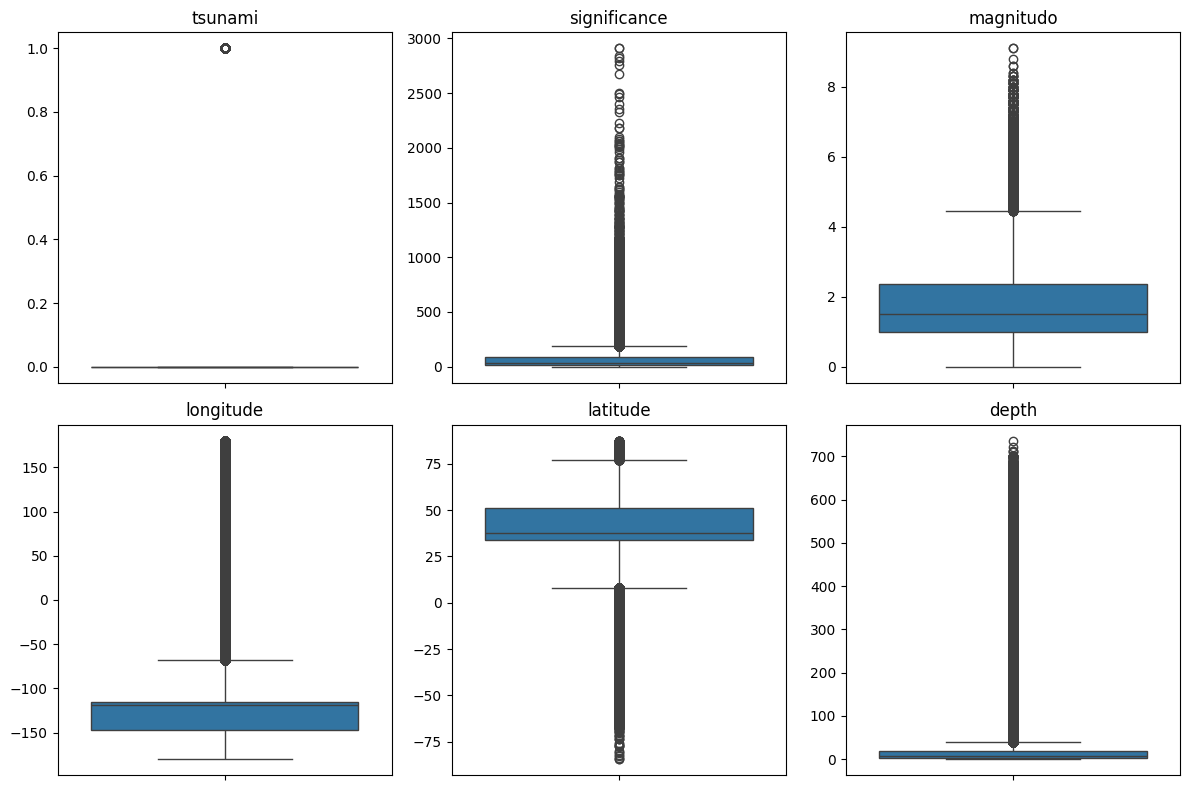

In [79]:
# Numeric columns to plot
numeric_features = ['tsunami', 'significance', 'magnitudo', 'longitude', 'latitude', 'depth']

rows = 2
cols = 3
fig, axes = plt.subplots(rows, cols, figsize=(12, 8))

axes = axes.flatten()

for i, feature in enumerate(numeric_features):
    sns.boxplot(y=df[feature], ax=axes[i])
    axes[i].set_title(feature)
    axes[i].set_ylabel('')

# Remove any empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [80]:
# Remove only negative magnitudes
df = df[df['magnitudo'] >= 0]

In [81]:
Q1 = 15
Q3 = 86
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
df['significance'] = df['significance'].clip(lower=lower_bound, upper=upper_bound)

In [82]:
# for feature in numeric_features:
#     Q1 = df[feature].quantile(0.25)
#     Q3 = df[feature].quantile(0.75)
#     IQR = Q3 - Q1
#     lower = Q1 - 1.5 * IQR
#     upper = Q3 + 1.5 * IQR
#     df[feature] = df[feature].clip(lower, upper)

# print("Outliers have been capped.")

In [83]:
Q1 = 3.837
Q3 = 18.11
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

df = df[df['depth'] >= 0]  # remove negative depths
df['depth'] = df['depth'].clip(upper=upper_bound)

In [84]:
# Longitude
Q1 = -147.1104
Q3 = -115.608333
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
df['longitude'] = df['longitude'].clip(lower=lower_bound, upper=upper_bound)

# Latitude
Q1 = 33.967167
Q3 = 51.156925
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
df['latitude'] = df['latitude'].clip(lower=lower_bound, upper=upper_bound)

In [85]:
capped_summary = []

for feature in numeric_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    capped_summary.append([feature, Q1, Q3, lower, upper, 0])

capped_df = pd.DataFrame(capped_summary, columns=['feature','Q1','Q3','lower_bound','upper_bound','outlier_count'])

capped_df

,feature,Q1,Q3,lower_bound,upper_bound,outlier_count
0,tsunami,0.000000,0.000000,0.000000,0.000000,0
1,significance,15.000000,86.000000,-91.500000,192.500000,0
2,magnitudo,0.980000,2.370000,-1.105000,4.455000,0
3,longitude,-147.110400,-115.608333,-194.363500,-68.355233,0
4,latitude,33.967167,51.156925,8.182529,76.941562,0
5,depth,3.837000,18.110000,-17.572500,39.519500,0


In [86]:
cols = ['significance', 'magnitudo', 'depth', 'longitude', 'latitude', 'tsunami']
df[cols].describe()

,significance,magnitudo,depth,longitude,latitude,tsunami
count,3.183688e+06,3.183688e+06,3.183688e+06,3.183688e+06,3.183688e+06,3.183688e+06
mean,6.166615e+01,1.851792e+00,1.359698e+01,-1.200285e+02,3.936927e+01,4.758632e-04
std,6.418674e+01,1.268777e+00,1.331266e+01,2.918040e+01,1.543396e+01,2.180910e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.799997e+02,8.182530e+00,0.000000e+00
25%,1.500000e+01,9.800000e-01,3.837000e+00,-1.471104e+02,3.396717e+01,0.000000e+00
50%,3.500000e+01,1.500000e+00,8.400000e+00,-1.189453e+02,3.786340e+01,0.000000e+00
75%,8.600000e+01,2.370000e+00,1.811000e+01,-1.156083e+02,5.115693e+01,0.000000e+00
max,1.925000e+02,9.100000e+00,3.951950e+01,-6.835523e+01,7.694156e+01,1.000000e+00


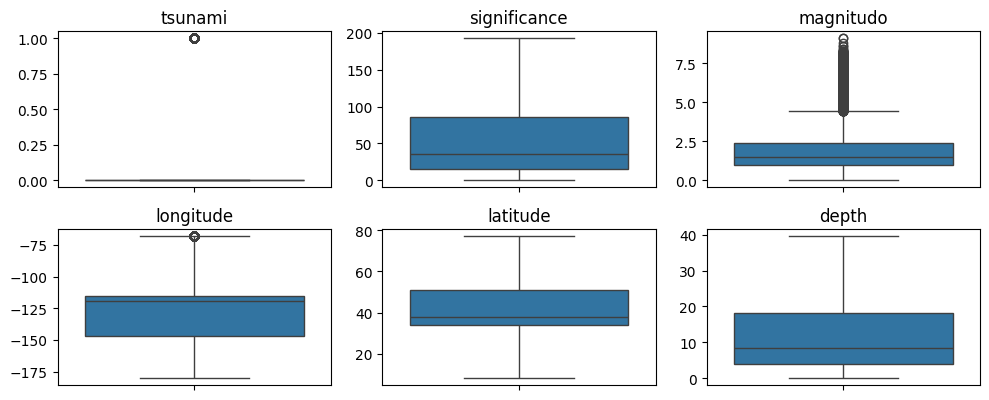

In [87]:
rows = 5
cols = 3
fig, axes = plt.subplots(rows, cols, figsize=(10, 10))

axes = axes.flatten()

for i, feature in enumerate(numeric_features):
    sns.boxplot(y=df[feature], ax=axes[i])
    axes[i].set_title(feature)
    axes[i].set_ylabel('')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [98]:
# Clean state names
df['state'] = df['state'].str.strip().str.title()

In [99]:
# Top 10 states by quake count
selected_states = df['state'].value_counts().head(10).index
quake_df = df[df['state'].isin(selected_states)]

In [100]:
# Pivot table: earthquakes per month per state
monthly_state_quakes = pd.pivot_table(
    quake_df,
    index='month',
    columns='state',
    values='time',
    aggfunc='count',
    fill_value=0
)

monthly_state_quakes

state,Alaska,California,Chile,Hawaii,Indonesia,Montana,Nevada,Puerto Rico,Utah,Washington
month,,,,,,,,,,
1,61920,101661,2645,9280,5051,5192,12192,10237,3661,3382
2,58340,91508,3001,11778,4049,3710,9853,3825,3575,3409
3,65101,102716,3745,9177,3934,3178,10099,3650,4914,3900
4,64145,100001,3396,9718,4537,3334,19234,3317,4151,3959
5,65195,104227,3005,13388,3800,3378,19573,3429,3649,4730
6,54477,99950,3126,7371,3923,4809,8903,2511,3375,4082
7,60058,109694,3100,8161,3517,4629,11264,3005,3199,4297
8,65674,112248,2730,10941,3651,4180,10467,3139,3237,4659
9,60489,109549,3387,9101,3909,3538,10618,3311,3262,4458


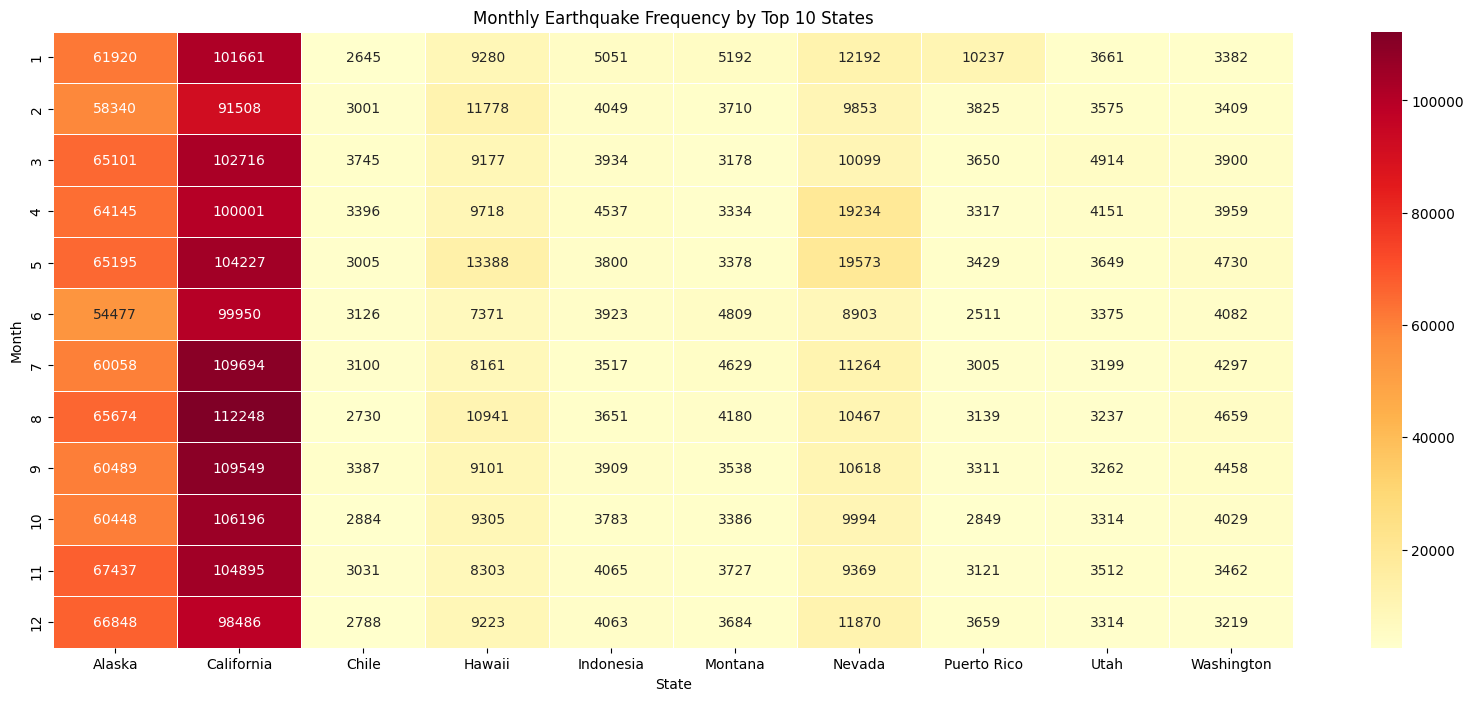

In [101]:
plt.figure(figsize=(20,8))
sns.heatmap(monthly_state_quakes, cmap='YlOrRd', linewidths=0.5, annot=True, fmt='d')
plt.title('Monthly Earthquake Frequency by Top 10 States')
plt.ylabel('Month')
plt.xlabel('State')
plt.show()


In [102]:
from sklearn.preprocessing import MaxAbsScaler, MinMaxScaler, StandardScaler
from sklearn.neighbors import NearestNeighbors
import pandas as pd

In [103]:
def get_knn(df, n, k, feature_names, metric='euclidean'):
    X = df[feature_names].values
    nbrs = NearestNeighbors(n_neighbors=k, metric=metric, algorithm='brute')
    nbrs.fit(X)

    distances, indices = nbrs.kneighbors([X[n]])

    neighbors_df = df.iloc[indices[0]].copy()
    neighbors_df = neighbors_df.reset_index(drop=True)
    neighbors_df['distance'] = distances[0]

    return neighbors_df


In [104]:
feature_names = ['magnitudo', 'depth', 'longitude', 'latitude', 'significance', 'tsunami']

In [105]:
scaler = StandardScaler()
df_scaled_values = scaler.fit_transform(df[feature_names])
df_scaled = pd.DataFrame(df_scaled_values, columns=feature_names)

In [106]:
# Euclidean distance
knn_euclidean = get_knn(df_scaled, 1, 10, feature_names, metric='euclidean')
knn_euclidean

,magnitudo,depth,longitude,latitude,significance,tsunami,distance
0,-0.348203,-0.526715,-1.205736,-1.299187,-0.477765,-0.021819,0.000000
1,-0.348203,-0.528819,-1.204983,-1.298885,-0.477765,-0.021819,0.002255
2,-0.348203,-0.525739,-1.202818,-1.299360,-0.477765,-0.021819,0.003082
3,-0.348203,-0.529495,-1.202492,-1.298529,-0.477765,-0.021819,0.004322
4,-0.348203,-0.526265,-1.201738,-1.297481,-0.477765,-0.021819,0.004370
5,-0.348203,-0.521833,-1.205108,-1.298140,-0.477765,-0.021819,0.005033
6,-0.348203,-0.525664,-1.208815,-1.294868,-0.477765,-0.021819,0.005408
7,-0.348203,-0.521457,-1.204583,-1.298043,-0.477765,-0.021819,0.005504
8,-0.348203,-0.533626,-1.203286,-1.298140,-0.477765,-0.021819,0.007407
9,-0.348203,-0.534077,-1.207627,-1.299868,-0.477765,-0.021819,0.007631


In [107]:
# Manhattan distance
unscaled_knn_manhattan = get_knn(df, 1, 10, feature_names, metric='manhattan')
unscaled_knn_manhattan

,time,place,status,tsunami,significance,data_type,magnitudo,state,longitude,latitude,depth,date,year,month,day,hour,distance
0,631153491210,"14 km S of Volcano, Hawaii",reviewed,0,31.0,earthquake,1.41,Hawaii,-155.212333,19.317667,6.585,1990-01-01 00:24:51.210,1990,1,1,0,0.000000
1,1147280540530,"14 km SSE of Volcano, Hawaii",reviewed,0,31.0,earthquake,1.41,Hawaii,-155.190333,19.322333,6.557,2006-05-10 17:02:20.530,2006,5,10,17,0.054667
2,664601032750,"15 km S of Volcano, Hawaii",reviewed,0,31.0,earthquake,1.43,Hawaii,-155.216333,19.300500,6.608,1991-01-23 03:23:52.750,1991,1,23,3,0.064167
3,1402226765250,"12 km S of Volcano, Hawaii",reviewed,0,31.0,earthquake,1.43,Hawaii,-155.221833,19.334500,6.604,2014-06-08 11:26:05.250,2014,6,8,11,0.065333
4,665888120940,"14 km SSE of Volcano, Hawaii",reviewed,0,31.0,earthquake,1.43,Hawaii,-155.187500,19.324167,6.559,1991-02-07 00:55:20.940,1991,2,7,0,0.077333
5,1125117517650,"11 km S of Volcano, Hawaii",reviewed,0,31.0,earthquake,1.43,Hawaii,-155.212167,19.337000,6.538,2005-08-27 04:38:37.650,2005,8,27,4,0.086500
6,702195474030,"14 km SSE of Volcano, Hawaii",reviewed,0,31.0,earthquake,1.42,Hawaii,-155.205333,19.319167,6.663,1992-04-02 06:17:54.030,1992,4,2,6,0.096500
7,1523835902860,"12 km SSE of Volcano, Hawaii",reviewed,0,31.0,earthquake,1.41,Hawaii,-155.194000,19.333833,6.650,2018-04-15 23:45:02.860,2018,4,15,23,0.099500
8,1092630625940,"16 km S of Fern Forest, Hawaii",reviewed,0,31.0,earthquake,1.41,Hawaii,-155.127167,19.315000,6.598,2004-08-16 04:30:25.940,2004,8,16,4,0.100833
9,1144203126350,"15 km S of Volcano, Hawaii",reviewed,0,31.0,earthquake,1.43,Hawaii,-155.251333,19.307167,6.620,2006-04-05 02:12:06.350,2006,4,5,2,0.104500


In [108]:
scaler_mas = MaxAbsScaler()
df_scaled = df.copy()
df_scaled[feature_names] = scaler_mas.fit_transform(df[feature_names])

In [109]:
# Euclidean distance
scaled_knn_euclidean = get_knn(df_scaled, 1, 10, feature_names, metric='euclidean')
scaled_knn_euclidean

,time,place,status,tsunami,significance,data_type,magnitudo,state,longitude,latitude,depth,date,year,month,day,hour,distance
0,631153491210,"14 km S of Volcano, Hawaii",reviewed,0.0,0.161039,earthquake,0.154945,Hawaii,-0.862292,0.251069,0.166627,1990-01-01 00:24:51.210,1990,1,1,0,0.000000
1,1092630625940,"16 km S of Fern Forest, Hawaii",reviewed,0.0,0.161039,earthquake,0.154945,Hawaii,-0.861819,0.251035,0.166956,2004-08-16 04:30:25.940,2004,8,16,4,0.000577
2,1147280540530,"14 km SSE of Volcano, Hawaii",reviewed,0.0,0.161039,earthquake,0.154945,Hawaii,-0.862170,0.251130,0.165918,2006-05-10 17:02:20.530,2006,5,10,17,0.000722
3,821006742700,"14 km SSE of Fern Forest, Hawaii",reviewed,0.0,0.161039,earthquake,0.154945,Hawaii,-0.861644,0.251412,0.166778,1996-01-07 09:25:42.700,1996,1,7,9,0.000749
4,837223421890,"9 km SW of Volcano, Hawaii",reviewed,0.0,0.161039,earthquake,0.154945,Hawaii,-0.862791,0.251936,0.166981,1996-07-13 02:03:41.890,1996,7,13,2,0.001061
5,1089388170770,"15 km S of Fern Forest, Hawaii",reviewed,0.0,0.161039,earthquake,0.154945,Hawaii,-0.861766,0.251201,0.165690,2004-07-09 15:49:30.770,2004,7,9,15,0.001082
6,1155557428950,"14 km S of Fern Forest, Hawaii",reviewed,0.0,0.161039,earthquake,0.156044,Hawaii,-0.861793,0.251277,0.166171,2006-08-14 12:10:28.950,2006,8,14,12,0.001307
7,1187518121870,"13 km SSE of Fern Forest, Hawaii",reviewed,0.0,0.161039,earthquake,0.156044,Hawaii,-0.861653,0.251496,0.166171,2007-08-19 10:08:41.870,2007,8,19,10,0.001416
8,1120294398480,"13 km SSE of Fern Forest, Hawaii",reviewed,0.0,0.161039,earthquake,0.156044,Hawaii,-0.861529,0.251583,0.166804,2005-07-02 08:53:18.480,2005,7,2,8,0.001444
9,1523835902860,"12 km SSE of Volcano, Hawaii",reviewed,0.0,0.161039,earthquake,0.154945,Hawaii,-0.862190,0.251279,0.168271,2018-04-15 23:45:02.860,2018,4,15,23,0.001661


In [110]:
# Manhattan distance
scaled_knn_manhattan = get_knn(df_scaled, 1, 10, feature_names, metric='manhattan')
scaled_knn_manhattan

,time,place,status,tsunami,significance,data_type,magnitudo,state,longitude,latitude,depth,date,year,month,day,hour,distance
0,631153491210,"14 km S of Volcano, Hawaii",reviewed,0.0,0.161039,earthquake,0.154945,Hawaii,-0.862292,0.251069,0.166627,1990-01-01 00:24:51.210,1990,1,1,0,0.000000
1,1092630625940,"16 km S of Fern Forest, Hawaii",reviewed,0.0,0.161039,earthquake,0.154945,Hawaii,-0.861819,0.251035,0.166956,2004-08-16 04:30:25.940,2004,8,16,4,0.000837
2,1147280540530,"14 km SSE of Volcano, Hawaii",reviewed,0.0,0.161039,earthquake,0.154945,Hawaii,-0.862170,0.251130,0.165918,2006-05-10 17:02:20.530,2006,5,10,17,0.000891
3,821006742700,"14 km SSE of Fern Forest, Hawaii",reviewed,0.0,0.161039,earthquake,0.154945,Hawaii,-0.861644,0.251412,0.166778,1996-01-07 09:25:42.700,1996,1,7,9,0.001142
4,1089388170770,"15 km S of Fern Forest, Hawaii",reviewed,0.0,0.161039,earthquake,0.154945,Hawaii,-0.861766,0.251201,0.165690,2004-07-09 15:49:30.770,2004,7,9,15,0.001594
5,837223421890,"9 km SW of Volcano, Hawaii",reviewed,0.0,0.161039,earthquake,0.154945,Hawaii,-0.862791,0.251936,0.166981,1996-07-13 02:03:41.890,1996,7,13,2,0.001720
6,1523835902860,"12 km SSE of Volcano, Hawaii",reviewed,0.0,0.161039,earthquake,0.154945,Hawaii,-0.862190,0.251279,0.168271,2018-04-15 23:45:02.860,2018,4,15,23,0.001957
7,995393221710,"13 km SSE of Volcano, Hawaii",reviewed,0.0,0.161039,earthquake,0.154945,Hawaii,-0.862105,0.251299,0.168398,2001-07-17 18:07:01.710,2001,7,17,18,0.002188
8,1155557428950,"14 km S of Fern Forest, Hawaii",reviewed,0.0,0.161039,earthquake,0.156044,Hawaii,-0.861793,0.251277,0.166171,2006-08-14 12:10:28.950,2006,8,14,12,0.002261
9,1120294398480,"13 km SSE of Fern Forest, Hawaii",reviewed,0.0,0.161039,earthquake,0.156044,Hawaii,-0.861529,0.251583,0.166804,2005-07-02 08:53:18.480,2005,7,2,8,0.002552


In [111]:
scaler_minmax = MinMaxScaler()
df_minmax = df.copy()
df_minmax[feature_names] = scaler_minmax.fit_transform(df[feature_names])

In [112]:
scaler_std = StandardScaler()
df_std = df.copy()
df_std[feature_names] = scaler_std.fit_transform(df[feature_names])

In [113]:
df_fs = df[numeric_features].copy()

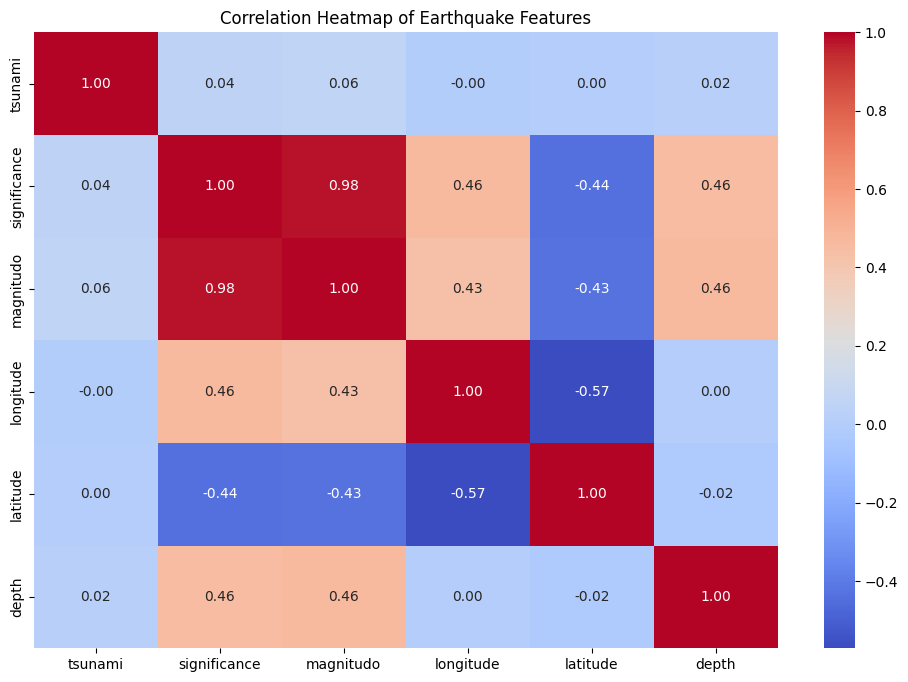

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(
    df_fs.corr(),
    annot=True,
    cmap='coolwarm',
    fmt='.2f'
)
heatmap.set_title('Correlation Heatmap of Earthquake Features')
plt.show()

In [115]:
df_ml = df.drop(columns=['time', 'place', 'data_type', 'status'])

In [116]:
!pip install pyod

In [117]:
from pyod.models.knn import KNN

In [118]:
outlier_features = ['magnitudo', 'depth', 'longitude', 'latitude', 'significance']

outlier_df = df[outlier_features].copy()

model = KNN()
model.fit(outlier_df)

outlier_df['is_outlier'] = model.predict(outlier_df) == 1

In [119]:
num_anomalies = outlier_df['is_outlier'].sum()
print("Number of Anomalous Earthquake Records:", num_anomalies)

Number of Anomalous Earthquake Records: 275412


In [120]:
outlier_indices = outlier_df[outlier_df['is_outlier']].index
df_final = df.drop(index=outlier_indices)

df_final.shape

(2908276, 16)

In [122]:
from sklearn.utils import resample
from sklearn.utils import shuffle

In [137]:
# Features (numeric only)
features = df[['magnitudo', 'depth', 'longitude', 'latitude', 'significance']]

# Target
target = df['tsunami']

In [138]:
# UPSAMPLING
def upsample(features, target):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    if len(features_zeros) > len(features_ones):
        features_minority, target_minority = features_ones, target_ones
        n_samples = len(features_zeros)
        features_majority, target_majority = features_zeros, target_zeros
    else:
        features_minority, target_minority = features_zeros, target_zeros
        n_samples = len(features_ones)
        features_majority, target_majority = features_ones, target_ones

    features_minority_upsampled, target_minority_upsampled = resample(
        features_minority, target_minority,
        replace=True,
        n_samples=n_samples,
        random_state=42
    )

    features_balanced = pd.concat([features_majority, features_minority_upsampled])
    target_balanced = pd.concat([target_majority, target_minority_upsampled])

    features_balanced, target_balanced = shuffle(features_balanced, target_balanced, random_state=42)
    return features_balanced.reset_index(drop=True), target_balanced.reset_index(drop=True)

In [139]:
# DOWNSAMPLING
def downsample(features, target):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    if len(features_zeros) > len(features_ones):
        features_majority, target_majority = features_zeros, target_zeros
        features_minority, target_minority = features_ones, target_ones
    else:
        features_majority, target_majority = features_ones, target_ones
        features_minority, target_minority = features_zeros, target_zeros

    features_majority_down, target_majority_down = resample(
        features_majority, target_majority,
        replace=False,
        n_samples=len(features_minority),
        random_state=42
    )

    features_balanced = pd.concat([features_majority_down, features_minority])
    target_balanced = pd.concat([target_majority_down, target_minority])

    features_balanced, target_balanced = shuffle(features_balanced, target_balanced, random_state=42)
    return features_balanced.reset_index(drop=True), target_balanced.reset_index(drop=True)

In [140]:
def show_sampling(features, target, method='upsample'):
    print("Before sampling:")
    print(target.value_counts())
    print(target.value_counts(normalize=True), "\n")

    if method == 'upsample':
        features_bal, target_bal = upsample(features, target)
    elif method == 'downsample':
        features_bal, target_bal = downsample(features, target)
    else:
        raise ValueError("method must be 'upsample' or 'downsample'")

    print(f"After {method}:")
    print(target_bal.value_counts())
    print(target_bal.value_counts(normalize=True))
    return features_bal, target_bal

In [141]:
# Upsample
features_upsampled, target_upsampled = show_sampling(features, target, method='upsample')

# Downsample
features_downsampled, target_downsampled = show_sampling(features, target, method='downsample')

Before sampling:
tsunami
0    3182173
1       1515
Name: count, dtype: int64
tsunami
0    0.999524
1    0.000476
Name: proportion, dtype: float64 

After upsample:
tsunami
1    3182173
0    3182173
Name: count, dtype: int64
tsunami
1    0.5
0    0.5
Name: proportion, dtype: float64
Before sampling:
tsunami
0    3182173
1       1515
Name: count, dtype: int64
tsunami
0    0.999524
1    0.000476
Name: proportion, dtype: float64 

After downsample:
tsunami
0    1515
1    1515
Name: count, dtype: int64
tsunami
0    0.5
1    0.5
Name: proportion, dtype: float64


In [142]:
df.dtypes

,0
time,int64
place,object
status,object
tsunami,int64
significance,float64
data_type,object
magnitudo,float64
state,object
longitude,float64
latitude,float64


In [143]:
df_categorical = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", df_categorical)

Categorical columns: ['place', 'status', 'data_type', 'state']


In [ ]:
# one-hot encoding to categorical columns
df = pd.get_dummies(df, drop_first=True, columns=df_categorical)

df.head()


In [ ]:
df.info()
df.head()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Replace 'target_column' with your actual target column name
target_column = 'target_column'  # e.g., 'churn', 'buy', etc.

# Split into 80% train+validation and 20% test
df_train_valid, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
# Split train+validation into 75% train and 25% validation
df_train, df_valid = train_test_split(df_train_valid, test_size=0.25, random_state=42)

In [ ]:
# Split train+validation into 75% train and 25% validation
df_train, df_valid = train_test_split(df_train_valid, test_size=0.25, random_state=42)

In [ ]:
# Training data
features_train = df_train.drop(target_column, axis=1)
target_train = df_train[target_column]

# Validation data
features_valid = df_valid.drop(target_column, axis=1)
target_valid = df_valid[target_column]

# Test data
features_test = df_test.drop(target_column, axis=1)
target_test = df_test[target_column]


In [ ]:
print("Train features shape:", features_train.shape)
print("Validation features shape:", features_valid.shape)
print("Test features shape:", features_test.shape)